<a href="https://colab.research.google.com/github/gitcnk/covid_experiment/blob/main/covid_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(ggplot2)
library(dplyr)

# read data
covid_clean <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/refs/heads/master/Stat254/covid_clean.csv')


In [3]:
# Data prep for the heatmap
tiny_data  <- covid_clean %>%
                filter(age < 90)

tiny_data %>%
  group_by(diabetes, hypertension,
           obesity, pneumonia, age) %>%
  summarise('sample_size' = n(),
            'icu_count' = sum(ICU_status),
            'icu_percent' = sum(ICU_status)/n()) -> icu_percent_data


icu_percent_data %>%
          na.omit() -> icu_percent_data



bucket_code <- as.numeric(icu_percent_data$diabetes) - 1 +
               as.numeric(icu_percent_data$hypertension) - 1 +
               as.numeric(icu_percent_data$obesity) - 1 +
               as.numeric(icu_percent_data$pneumonia) - 1

icu_percent_data$bucket_code <- bucket_code


myf <- function(x)
{
  out <- (as.character(x) )
  return(toString(out))
}


icu_percent_data$bucket_id <- apply(icu_percent_data[, 1:4], MARGIN = 1, FUN = myf)

`summarise()` has grouped output by 'diabetes', 'hypertension', 'obesity',
'pneumonia'. You can override using the `.groups` argument.
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”


In [13]:
head(icu_percent_data)
tail(icu_percent_data)

diabetes,hypertension,obesity,pneumonia,age,sample_size,icu_count,icu_percent,bucket_code,bucket_id
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
No,No,No,No,0,839,247,0.29439809,NA,"No, No, No, No"
No,No,No,No,1,459,34,0.07407407,NA,"No, No, No, No"
No,No,No,No,2,209,10,0.04784689,NA,"No, No, No, No"
No,No,No,No,3,137,7,0.05109489,NA,"No, No, No, No"
No,No,No,No,4,167,10,0.05988024,NA,"No, No, No, No"
No,No,No,No,5,126,7,0.05555556,NA,"No, No, No, No"


diabetes,hypertension,obesity,pneumonia,age,sample_size,icu_count,icu_percent,bucket_code,bucket_id
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
Yes,Yes,Yes,Yes,84,20,3,0.15000000,NA,"Yes, Yes, Yes, Yes"
Yes,Yes,Yes,Yes,85,15,0,0.00000000,NA,"Yes, Yes, Yes, Yes"
Yes,Yes,Yes,Yes,86,12,1,0.08333333,NA,"Yes, Yes, Yes, Yes"
Yes,Yes,Yes,Yes,87,15,3,0.20000000,NA,"Yes, Yes, Yes, Yes"
Yes,Yes,Yes,Yes,88,17,1,0.05882353,NA,"Yes, Yes, Yes, Yes"
Yes,Yes,Yes,Yes,89,3,0,0.00000000,NA,"Yes, Yes, Yes, Yes"


## Heatmap


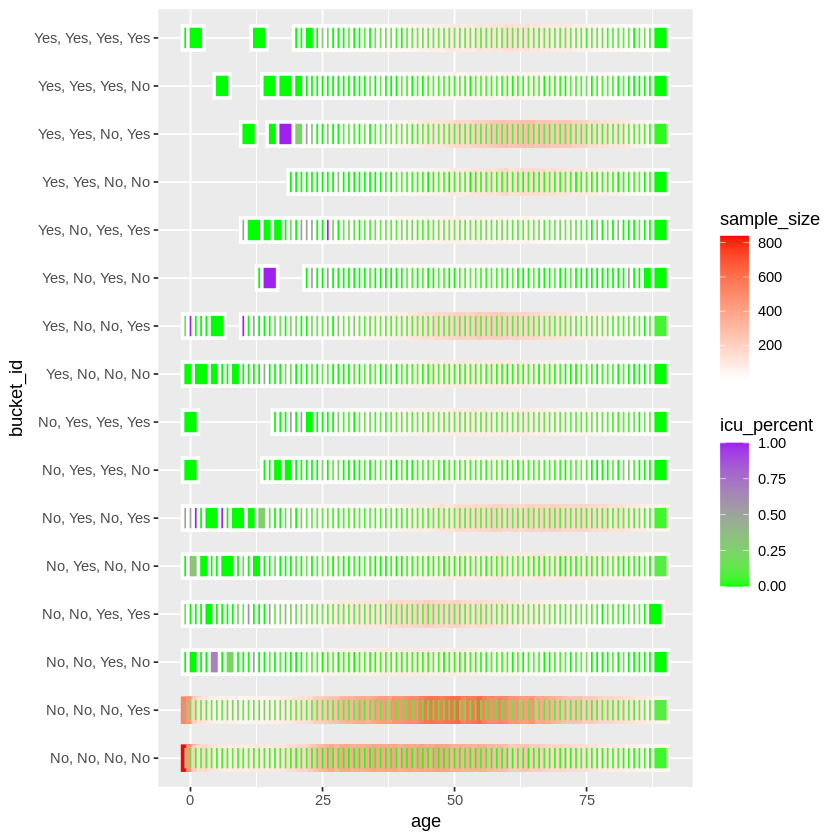

In [4]:
# Heatmap
icu_percent_data %>%
  ggplot() +
  aes(x = age ,
      y = bucket_id,
      fill = icu_percent,
      col = sample_size) +
  geom_tile( height = 0.5, width = 3, linewidth = 1) +
  scale_fill_continuous(low = 'green', high = 'purple') +
  scale_color_continuous(low = 'white', high = 'red')

### Bucket codes as in the following order:

diabetes, hypertension,	   obesity,	   pneumonia

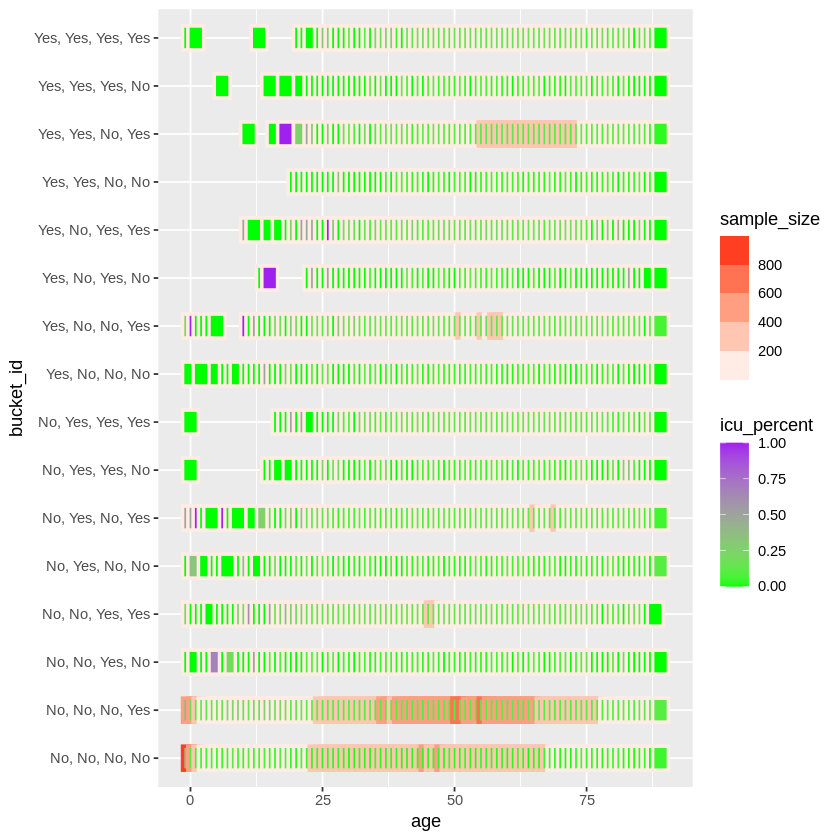

In [5]:
icu_percent_data %>%
  ggplot() +
  aes(x = age ,
      y = bucket_id,
      fill = icu_percent,
      col = sample_size) +
  geom_tile( height = 0.5, width = 3, linewidth = 1) +
  scale_fill_continuous(low = 'green', high = 'purple') +
  scale_color_steps2(low = 'yellow', mid = 'white',
                         high = 'red')


In [21]:
m1 <- glm(as.factor(admitted_to_icu) ~ diabetes + hypertension +
                                       obesity + pneumonia + age,
          data = covid_clean,
          family = 'binomial')


model_predictions <- predict(m1,
                             newdata = icu_percent_data[, 1:5],
                             type = 'response')


icu_percent_data$model_predictions <- model_predictions

In [27]:
tail(icu_percent_data)

diabetes,hypertension,obesity,pneumonia,age,sample_size,icu_count,icu_percent,bucket_code,bucket_id,model_predictions
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
Yes,Yes,Yes,Yes,84,20,3,0.15000000,NA,"Yes, Yes, Yes, Yes",0.10132973
Yes,Yes,Yes,Yes,85,15,0,0.00000000,NA,"Yes, Yes, Yes, Yes",0.10035114
Yes,Yes,Yes,Yes,86,12,1,0.08333333,NA,"Yes, Yes, Yes, Yes",0.09938096
Yes,Yes,Yes,Yes,87,15,3,0.20000000,NA,"Yes, Yes, Yes, Yes",0.09841914
Yes,Yes,Yes,Yes,88,17,1,0.05882353,NA,"Yes, Yes, Yes, Yes",0.09746561
Yes,Yes,Yes,Yes,89,3,0,0.00000000,NA,"Yes, Yes, Yes, Yes",0.09652034


In [41]:
## Check

predict(m1, newdata = data.frame(diabetes = 'No',
                                 hypertension = 'No',
                                 obesity = 'No',
                                 pneumonia = 'No',
                                 age = 0),
                                 type = 'response')

model_predictions[1:4]


1 
0.05570331

1          2          3          4 
0.05570331 0.05513832 0.05457873 0.05402450